In [ ]:
!pip install pingouin
!pip install --upgrade --force-reinstall # link of a private repository
import requests
import os
import json
import pandas as pd
import networkx as nx

  Cloning https://github.com/tantantan12/itom6219.git to /tmp/pip-req-build-vr4hxzn8
  Running command git clone --filter=blob:none --quiet https://github.com/tantantan12/itom6219.git /tmp/pip-req-build-vr4hxzn8
  Resolved https://github.com/tantantan12/itom6219.git to commit e22b2e16673b5f6f6bf082d4cfe59522517dbbc2
  Preparing metadata (setup.py) ... done
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached charset_normalizer-3.4.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any

In [ ]:
import os
from google.colab import userdata
os.environ["BEARER_TOKEN"] =userdata.get('BEARER_TOKEN')

from itom6219 import  user_info, user_tweets, user_tweets_all, search_tweets_by_topic  ,extract_user_mention_edges

tweets_dict = search_tweets_by_topic(
    topic="foodvlog",
    include_mentions=True,
    max_results=50,
    start_time='2025-04-10T10:14:49Z',
    end_time='2025-04-16T10:14:49Z'
)

print(tweets_dict.keys())  # e.g., ['data', 'meta', 'includes']

dict_keys(['data', 'includes', 'meta'])


In [ ]:
tweets_dict

{'data': [{'edit_history_tweet_ids': ['1912269562860483020'],
   'author_id': '994405844',
   'public_metrics': {'retweet_count': 2,
    'reply_count': 0,
    'like_count': 0,
    'quote_count': 0,
    'bookmark_count': 0,
    'impression_count': 0},
   'id': '1912269562860483020',
   'entities': {'mentions': [{'start': 3,
      'end': 18,
      'username': 'EJRivera011984',
      'id': '994405844'}]},
   'created_at': '2025-04-15T22:19:26.000Z',
   'text': 'RT @EJRivera011984: The #Empanada #festival in #Tampa was #delicious. Check out our most recent #adventure.\n\n#vlog #festivalvlog #foodvlog…'},
  {'edit_history_tweet_ids': ['1912085182279991777'],
   'author_id': '28905257',
   'public_metrics': {'retweet_count': 0,
    'reply_count': 0,
    'like_count': 0,
    'quote_count': 0,
    'bookmark_count': 0,
    'impression_count': 35},
   'id': '1912085182279991777',
   'entities': {'mentions': [{'start': 104,
      'end': 112,
      'username': 'YouTube',
      'id': '10228272'}]},

In [ ]:
user_df, edge_df = extract_user_mention_edges(tweets_dict)
user_df

,name,username,description,verified,id,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,public_metrics.like_count,public_metrics.media_count
0,Joel ☀️🌊❤️,EJRivera011984,🇵🇷 Work in education. Love 🏈🚢🐕🎥🎧🛫📺👬🏋️🍢🐂 - Go B...,False,994405844,90,421,8780,6,12177,388
1,tZÜ༄Sapp  a.k.a The Black Inuyasha,Tzunami_Sapp,#TBI 🗡️🥷🏾 I exist where 𝕏BO𝕏 Game Pass exists...,False,28905257,1418,2874,33517,9,15130,12903
2,YouTube,YouTube,your streaming home for @coachella weekend 2 🌵,True,10228272,79485811,1152,59927,77834,6094,15986
3,Hannah Garcia,yorkjiang,https://t.co/FsukZfLExD,False,605434719,4,5,960,1,652,456
4,NORIKA CLEM ♥️ 🇺🇸📍,NorikaClem,"Entertainment, Beauty , Lifestyle & Humor Foll...",False,190053693,926,840,10069,23,3980,3595
5,~ ศุภชัย ~,theRealSupachai,a professional idiot . The low budget Tony Jaa...,False,1887015158,6089,264,18606,14,25793,799
6,Odinson,Bark252,"Living life one day at a time. Graphic artist,...",False,43958989,154,442,4462,6,5493,252
7,Dr Steephan Neroshan стефен ♏️🇱🇰🇷🇺🌏,steve4you4ever,"🩺👨‍🎓 MD from🇷🇺 ,tips,health&fitness sports,tec...",False,4368536056,498,4922,75935,2,42603,660
8,IBC Tamil,ibctamilmedia,உலகத் தமிழருக்கோர் உறவுப்பாலம்,False,2705273238,117678,20,166622,173,129,76741
9,yasuhiro06,yasuhiro0679179,,False,1911555994523418624,0,0,250,0,0,0


In [ ]:
user_df.to_csv("user_attributes.csv", index=False)
edge_df.to_csv("mention_edgelist.csv", index=False)

In [ ]:
edge_df

,source,target
0,EJRivera011984,EJRivera011984
1,Tzunami_Sapp,YouTube
2,yorkjiang,YouTube
3,NorikaClem,YouTube
4,theRealSupachai,YouTube
5,Bark252,EJRivera011984
6,steve4you4ever,ibctamilmedia
7,yasuhiro0679179,jeongjongc89129
8,yasuhiro0679179,MayPatienc54406
9,yasuhiro0679179,adande_sulaimon


In [ ]:
import networkx as nx

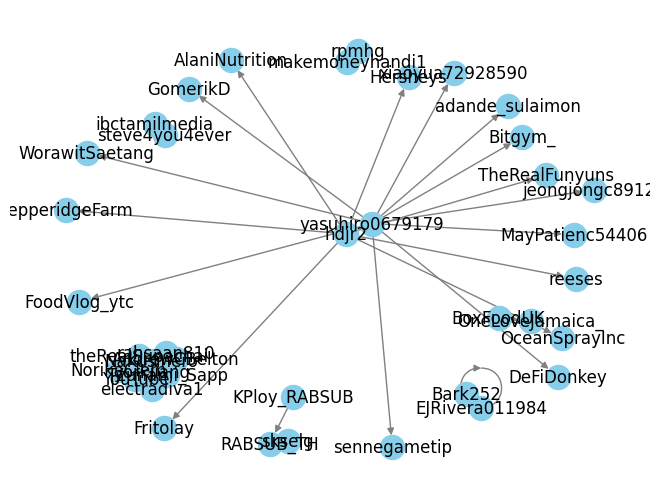

In [ ]:
G=nx.from_pandas_edgelist(edge_df,
                            source="source",
                            target="target",
                            create_using=nx.DiGraph()) # No need to add create_using=nx.DiGraph() if it is an undirected graph


nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray',pos = nx.spring_layout(G))


In [ ]:
# Calculate eigenvector centrality
eigenvector_centrality =  nx.eigenvector_centrality(G)
# Calculate in-degree centrality
in_degree_centrality =  nx.in_degree_centrality(G)
# Calculate out-degree centrality
out_degree_centrality = nx.out_degree_centrality(G)
# Calculate betweenness centrality
betweenness_centrality =  nx.betweenness_centrality(G)
# Calculate closeness centrality
closeness_centrality =  nx.closeness_centrality(G)
# Save node attributes.
nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centrality')
nx.set_node_attributes(G,in_degree_centrality,"in_degree_centrality")
nx.set_node_attributes(G,out_degree_centrality,"out_degree_centrality")
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

In [ ]:
node_attribute=user_df.copy()

for index, row in node_attribute.iterrows():
    node = row['username']
    if node in G.nodes:
        for col in ['username','public_metrics.followers_count','public_metrics.tweet_count','public_metrics.like_count']:
            G.nodes[node][col] = row[col]

In [ ]:
import pandas as pd

attributes_list=[]
for node, attributes in G.nodes(data=True):
    attributes_list.append(attributes)

attributes_df=pd.DataFrame(attributes_list)

In [ ]:
attributes_df.head()

,eigenvector_centrality,in_degree_centrality,out_degree_centrality,betweenness_centrality,closeness_centrality,username,public_metrics.followers_count,public_metrics.tweet_count,public_metrics.like_count
0,1.000000e+00,0.052632,0.026316,0.0,0.026316,EJRivera011984,90,8780,12177
1,2.980232e-08,0.000000,0.026316,0.0,0.000000,Tzunami_Sapp,1418,33517,15130
2,5.751848e-06,0.210526,0.000000,0.0,0.210526,YouTube,79485811,59927,6094
3,2.980232e-08,0.000000,0.026316,0.0,0.000000,yorkjiang,4,960,652
4,2.980232e-08,0.000000,0.026316,0.0,0.000000,NorikaClem,926,10069,3980


In [ ]:
attributes_df1 =attributes_df.sort_values(by="eigenvector_centrality", ascending=False)
attributes_df1.head(10)

,eigenvector_centrality,in_degree_centrality,out_degree_centrality,betweenness_centrality,closeness_centrality,username,public_metrics.followers_count,public_metrics.tweet_count,public_metrics.like_count
0,1.000000e+00,0.052632,0.026316,0.0,0.026316,EJRivera011984,90,8780,12177
2,5.751848e-06,0.210526,0.000000,0.0,0.210526,YouTube,79485811,59927,6094
22,1.460314e-06,0.052632,0.000000,0.0,0.052632,RABSUB_TH,2094,6086,7220
10,7.450581e-07,0.026316,0.000000,0.0,0.026316,jeongjongc89129,0,0,0
12,7.450581e-07,0.026316,0.000000,0.0,0.026316,adande_sulaimon,2,71,52
8,7.450581e-07,0.026316,0.000000,0.0,0.026316,ibctamilmedia,117678,166622,129
13,7.450581e-07,0.026316,0.000000,0.0,0.026316,GomerikD,0,1,0
38,7.450581e-07,0.026316,0.000000,0.0,0.026316,Hersheys,296194,21745,3910
36,7.450581e-07,0.026316,0.000000,0.0,0.026316,Fritolay,338402,34888,669
37,7.450581e-07,0.026316,0.000000,0.0,0.026316,reeses,361540,19439,5789


In [ ]:
attributes_df2=attributes_df.sort_values(by="in_degree_centrality", ascending=False)
attributes_df2.head(10)

,eigenvector_centrality,in_degree_centrality,out_degree_centrality,betweenness_centrality,closeness_centrality,username,public_metrics.followers_count,public_metrics.tweet_count,public_metrics.like_count
2,5.751848e-06,0.210526,0.000000,0.0,0.210526,YouTube,79485811,59927,6094
0,1.000000e+00,0.052632,0.026316,0.0,0.026316,EJRivera011984,90,8780,12177
22,1.460314e-06,0.052632,0.000000,0.0,0.052632,RABSUB_TH,2094,6086,7220
10,7.450581e-07,0.026316,0.000000,0.0,0.026316,jeongjongc89129,0,0,0
12,7.450581e-07,0.026316,0.000000,0.0,0.026316,adande_sulaimon,2,71,52
8,7.450581e-07,0.026316,0.000000,0.0,0.026316,ibctamilmedia,117678,166622,129
13,7.450581e-07,0.026316,0.000000,0.0,0.026316,GomerikD,0,1,0
38,7.450581e-07,0.026316,0.000000,0.0,0.026316,Hersheys,296194,21745,3910
36,7.450581e-07,0.026316,0.000000,0.0,0.026316,Fritolay,338402,34888,669
37,7.450581e-07,0.026316,0.000000,0.0,0.026316,reeses,361540,19439,5789


Based on the eigenvector value for the network for topic "food volg", I'd like YouTube to be an influencer, means we can put digital advertisements in the Youtube offical account, to make more people who see food vlogs (those people who like to try different food or restaurant) to see our restaurant finder app.